# [과제 3] 로지스틱 회귀분석

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [96]:
data = pd.read_csv("assignment3_creditcard.csv")

In [97]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 0. DATA INFO

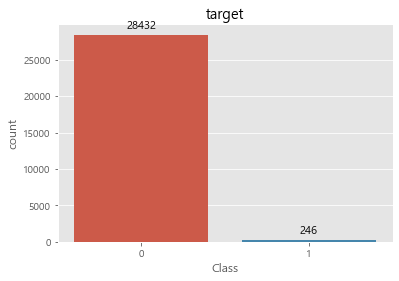

In [98]:
plt.style.use('ggplot')
ax = sns.countplot(x='Class',data=data)
for p in ax.patches:
    ax.annotate("%.0f"%p.get_height(),(p.get_x() + p.get_width()/2, p.get_height()-10),
                ha='center', va='center', fontsize=11, color='black', xytext=(0,10),
                textcoords='offset points')
plt.title('target')
plt.show()

정상거래 : 이상거래 = 28432 : 246 (건)으로 불균형이 매우 심한 데이터임을 확인할 수 있다.

train, test 데이터가 나눠져 있지 않기 때문에 임의로 train, test 를 7:3 비율로 나눠 분석을 진행하겠습니다. 

target 변수의 경우 불균형이 심하여 train과 test를 나눌때 stratify 를 통해 target의 비율을 맞춰주었습니다

In [99]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ['Class'])
y = data[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=44)

In [100]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (20074, 28)
X_test (8604, 28)
y_train (20074, 1)
y_test (8604, 1)


## 1. sklearn 패키지를 사용해 로지스틱 회귀분석을 진행해주세요.

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

def print_score(label, prediction):
    clf_report = pd.DataFrame(classification_report(label, prediction, output_dict=True))
    print(f"Accuracy Score: {accuracy_score(label, prediction) * 100:.2f}%")
    print("_______________________________________________")
    print(f"Classification Report:\n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: \n {confusion_matrix(label, prediction)}\n")

In [102]:
model = LogisticRegression(random_state=44)
model.fit(X_train, y_train)

LogisticRegression(random_state=44)

In [103]:
model.get_params() # 모델 파라미터 값 확인

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 44,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

## 2. 성능지표를 계산하고 이에 대해 해석해주세요.

In [104]:
print("train data acc",model.score(X_train,y_train))
print("test data acc",model.score(X_test,y_test))

train data acc 0.9980571884029092
test data acc 0.9975592747559274


주어진 데이터가 99:1 의 비율이기 때문에 모델에 입장에서 모든 데이터를 정상거래라고 판단해도 99%의 정확도가 나오게 됩니다. 

때문에 정확도는 평가지표로 적절하지 않다고 판단하여 혼동행렬값을 확인해 보겠습니다.

In [105]:
y_pred = model.predict(X_test)
print_score(y_test, y_pred.round())

Accuracy Score: 99.76%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.998010   0.934426  0.997559     0.966218      0.997463
recall        0.999531   0.770270  0.997559     0.884901      0.997559
f1-score      0.998770   0.844444  0.997559     0.921607      0.997443
support    8530.000000  74.000000  0.997559  8604.000000   8604.000000
_______________________________________________
Confusion Matrix: 
 [[8526    4]
 [  17   57]]



In [117]:
recall_score(y_test, y_pred.round())

0.7702702702702703

sklearn.matrix 내 confusion_matrix 를 이용해 혼동행렬 출력 결과,

**`이상거래를 정상거래로 판단한 경우는 17건`** 입니다.

이상거래가 정상거래로 판별 되는 경우를 바로잡는 것이 중요하다고 판단하여 `FN(False Negative)`과 이상거래를 정상거래라고 분류한 확률 값(이상거래에 대한 recall 값)을 통해 성능을 평가하겠습니다.

## 3. 성능 개선을 시도해주세요.

test dataset 의 정보를 모른다는 가정하에 train data에 대해 EDA 진행

<span style="color:red"> **[1] 차원 축소에 따른 성능 비교** </span>

In [49]:
train = pd.concat([X_train,y_train],axis=1) # 트레인데이터를 새로 정의해주었습니다.

In [26]:
train.iloc[:,0:10].describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
count,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000
mean,-0.030708,0.046777,-0.041258,0.046500,-0.027385,-0.005381,-0.051899,0.014070,-0.015991,-0.048724
std,2.042687,1.631514,1.768965,1.476215,1.522254,1.349015,1.455350,1.356849,1.119467,1.233949
min,-30.552380,-42.172688,-31.103685,-4.897347,-42.147898,-21.929312,-31.197329,-37.353443,-9.481456,-22.187089
25%,-0.923905,-0.573840,-0.902832,-0.832598,-0.706877,-0.763677,-0.565292,-0.204335,-0.654927,-0.547018
50%,0.001851,0.078143,0.188156,-0.000898,-0.049053,-0.269308,0.036554,0.023723,-0.055430,-0.100033
75%,1.313980,0.810786,1.042351,0.776739,0.613642,0.402054,0.557642,0.334537,0.607531,0.446531
max,2.399484,16.713389,4.069865,11.906170,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028


In [27]:
train.iloc[:,10:20].describe()

,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
count,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000
mean,0.032296,-0.047642,0.016754,-0.051381,-0.016255,-0.029725,-0.045269,-0.011005,0.011423,0.002407
std,1.098934,1.212796,0.994754,1.196191,0.916781,1.003380,1.187421,0.889908,0.826878,0.703874
min,-4.339319,-18.431131,-3.844974,-18.493773,-3.894020,-13.303888,-24.019099,-9.335193,-4.619034,-21.387122
25%,-0.753091,-0.418355,-0.632090,-0.447398,-0.602252,-0.475300,-0.496503,-0.498839,-0.456144,-0.209963
50%,-0.013948,0.139079,-0.004538,0.037518,0.041313,0.065458,-0.067288,-0.004310,0.003960,-0.062900
75%,0.761608,0.612439,0.680241,0.493550,0.632979,0.520888,0.410429,0.514869,0.474850,0.133554
max,11.669205,4.406338,3.685570,6.991753,3.680272,6.098529,7.611862,3.864315,5.228342,26.237391


In [28]:
train.iloc[:,20:].describe()

,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000
mean,0.011967,0.001385,-0.008367,0.000133,-0.002802,-0.001615,0.002675,-0.000700,0.008568
std,0.828682,0.737505,0.610700,0.601812,0.518908,0.483115,0.399114,0.284666,0.092170
min,-14.058810,-8.887017,-36.666000,-2.649179,-6.712624,-1.603645,-7.418878,-9.617915,0.000000
25%,-0.226018,-0.536694,-0.161657,-0.354855,-0.318857,-0.329932,-0.070603,-0.052632,0.000000
50%,-0.027971,0.012812,-0.012712,0.040399,0.020137,-0.056221,0.001696,0.011283,0.000000
75%,0.186116,0.531897,0.144960,0.437260,0.354475,0.239085,0.092629,0.079661,0.000000
max,27.202839,4.799794,8.396046,3.948061,2.510401,3.067907,11.135740,5.050808,1.000000


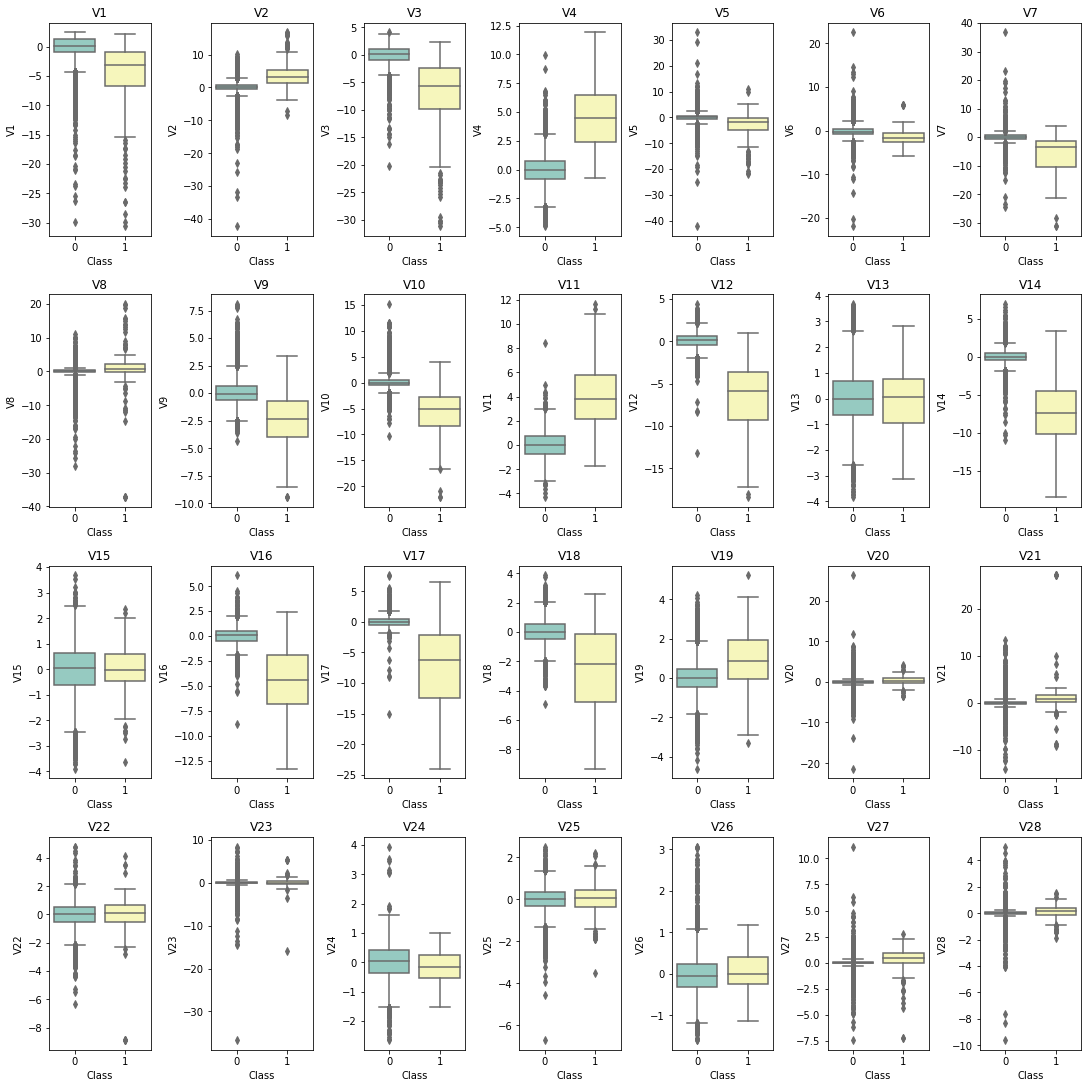

In [25]:
'''
피쳐별 box plot을 찍어 모양을 확인해 보겠습니다.
'''
columns_list = X_train.columns
fig, ax = plt.subplots(4, 7, figsize=(15, 15), constrained_layout=True)
ax = ax.flatten()

i = 0
for col in columns_list:
    ax[i].set(title = col)
    sns.boxplot(x='Class', y = col, data=train, palette = "Set3", ax=ax[i])
    i+=1
    
plt.show()

boxplot 을 확인해본 결과 전체적인 box의 크기와 위치가 비슷한 칼럼과 그렇지 않은 칼럼으로 나뉩니다. 

전체적으로 `V1 ~ V19` 는 box의 위치와 크기에 차이가 있는 칼럼이 많고 `V20 이후`로는 box의 차이가 크지 않습니다. 

이상치의 경우 class=1 인 값의 수가 class=0 인 값에 비해 작기 때문에 plot 내 이상치로 찍힌 값은 비교하지 않았습니다. 

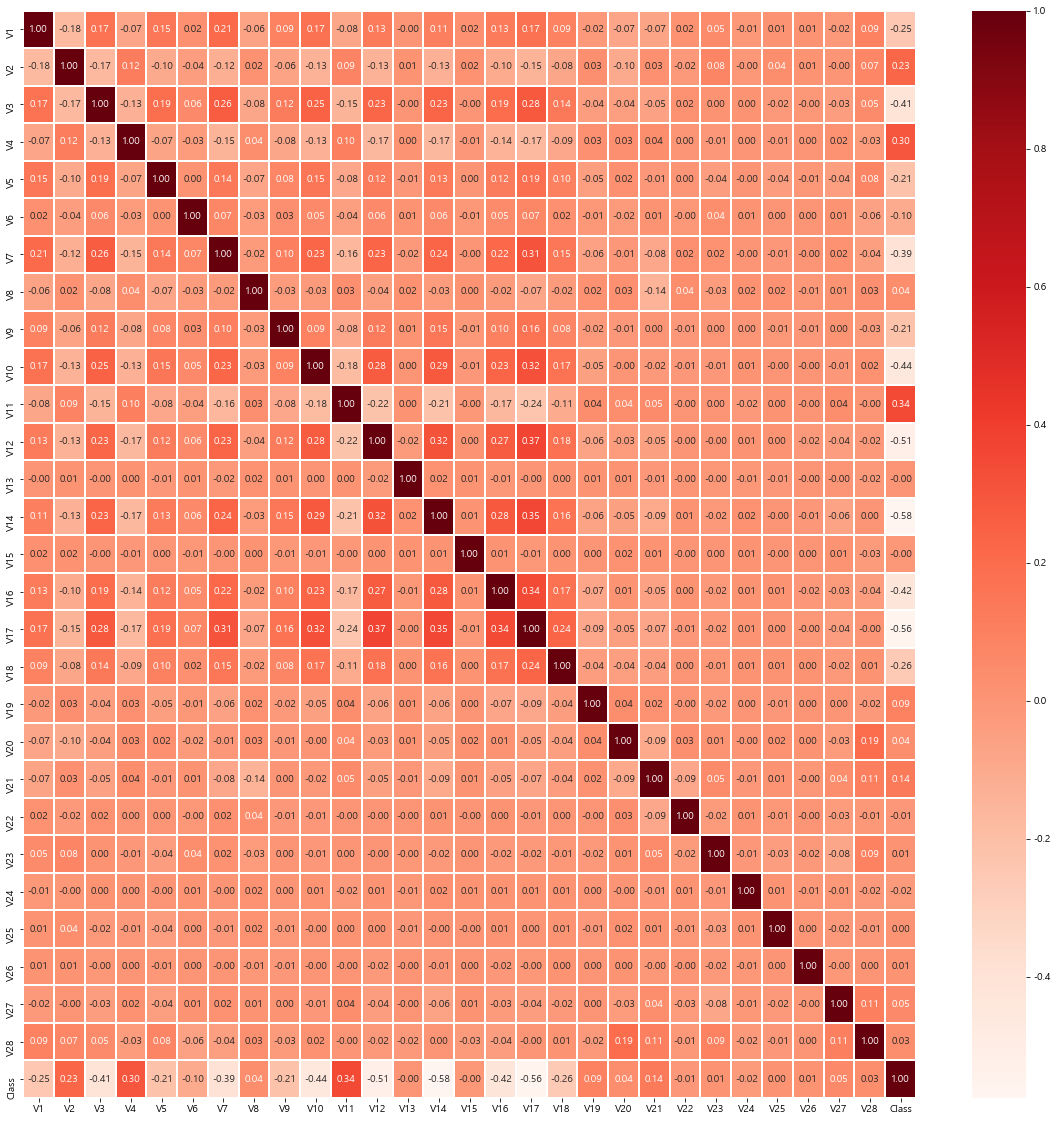

In [58]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(), cmap = 'Reds', annot=True, fmt = '.2f', linewidths=1)
plt.show()

상관관계 plot을 찍어본 결과 boxplot 과 비슷하게 `V1 ~ V18` 은 약한 상관관계를 보여주지만 `V19 이후`로는 상관관계가 0에 가깝습니다. **사용자 ID 및 민감한 기능을 보호하기 위해 PCA 차원 축소(v1-v28)의 결과일 수 있다** 라는 데이터 설명을 확인하였고 Class에 따른 box plot과 heatmap 확인을 통해 칼럼의 차원을 줄여도 괜찮다고 판단하였습니다. 사용변수는  또한 칼럼별 스케일의 차이가 있지만 Robust 스케일링 후 결과를 비교했을때 차이가 없어 스케일링은 따로 진행하지 않았습니다.

<span style="color:BLUE"> 사용변수는 V1 - V19 입니다. </span>

In [64]:
X_train_new = X_train.drop(columns = ['V20','V21','V22','V23','V24','V25','V26','V27','V28'])
X_test_new = X_test.drop(columns = ['V20','V21','V22','V23','V24','V25','V26','V27','V28'])

In [62]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20074 entries, 23896 to 5273
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20074 non-null  float64
 1   V2      20074 non-null  float64
 2   V3      20074 non-null  float64
 3   V4      20074 non-null  float64
 4   V5      20074 non-null  float64
 5   V6      20074 non-null  float64
 6   V7      20074 non-null  float64
 7   V8      20074 non-null  float64
 8   V9      20074 non-null  float64
 9   V10     20074 non-null  float64
 10  V11     20074 non-null  float64
 11  V12     20074 non-null  float64
 12  V13     20074 non-null  float64
 13  V14     20074 non-null  float64
 14  V15     20074 non-null  float64
 15  V16     20074 non-null  float64
 16  V17     20074 non-null  float64
 17  V18     20074 non-null  float64
 18  V19     20074 non-null  float64
dtypes: float64(19)
memory usage: 3.6 MB


In [76]:
model = LogisticRegression(random_state=44)
model.fit(X_train_new, y_train)

LogisticRegression(random_state=44)

In [77]:
y_pred = model.predict(X_test_new)
print_score(y_test, y_pred.round())

Accuracy Score: 99.76%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.998010   0.934426  0.997559     0.966218      0.997463
recall        0.999531   0.770270  0.997559     0.884901      0.997559
f1-score      0.998770   0.844444  0.997559     0.921607      0.997443
support    8530.000000  74.000000  0.997559  8604.000000   8604.000000
_______________________________________________
Confusion Matrix: 
 [[8526    4]
 [  17   57]]



V20-V28 칼럼을 제거한 결과 기존 V1-V28을 모두 사용했을 때와 평가지표의 값이 같습니다. 

V20-V28 은 Class 분류에 있어 중요하지 않은 변수임이 확인 가능합니다.

<span style="color:red"> **[2] 데이터 불균형 해소에 따른 성능 비교** </span>

주어진 데이터는 99:1 의 비율로 불균형이 매우 심합니다. 오버샘플링을 통해 불균형 문제 해결에 따른 성능향상이 있는지 확인해 보겠습니다.

**smote tomek : 가까이 붙어 있는 서로 다른 클래스의 데이터 중 다수 클래스에 속하는 데이터를 삭제하며 데이터 생성**

In [79]:
from imblearn.combine import SMOTETomek

In [80]:
X_smote, y_smote = SMOTETomek(random_state=44).fit_sample(X_train_new, y_train)

In [133]:
len(X_smote)-len(X_train_new)

19730

In [81]:
model = LogisticRegression(random_state=44)
model.fit(X_smote, y_smote)

LogisticRegression(random_state=44)

In [82]:
y_pred = model.predict(X_test_new)
print_score(y_test, y_pred.round())

Accuracy Score: 97.84%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.999162   0.272358  0.978382     0.635760      0.992911
recall        0.979015   0.905405  0.978382     0.942210      0.978382
f1-score      0.988986   0.418750  0.978382     0.703868      0.984082
support    8530.000000  74.000000  0.978382  8604.000000   8604.000000
_______________________________________________
Confusion Matrix: 
 [[8351  179]
 [   7   67]]



**평가지표를 확인해보면 정상거래를 이상거래로 분류한 케이스가 늘었지만 이상거래를 정상거래로 분류한 케이스는 줄었음 알 수 있습니다.**

**이상거래에 대한 recall 값도 0.905405 평가지표의 성능이 올랐습니다.**

<span style="color:red"> **[3] hyper parameters 수정에 따른 성능 비교** </span>

우선 smote를 진행한 데이터의 경우 99:1 의 불균형을 맞춰주어 성능이 향상되었지만 이 경우 19730개라는 이상거래 데이터가 smote 에 근거하여 생성되었기 때문에 실제 이상거래 데이터와는 차이가 있을 것이고 이는 새로운 데이터 생성에 가깝다고 생각하여 smote를 하지 않은 데이터에 모델의 일부 하이퍼파라미터를 수정하여 성능을 확인해 보았습니다.

In [120]:
pip install optuna

In [121]:
from sklearn.metrics import *
import optuna
from optuna.samplers import TPESampler
import joblib

In [140]:
# Optuna를 통한 하이퍼 파라미터 설정
def objective(trial):
    param = {"C": trial.suggest_loguniform("C",0.1,20),
             "max_iter": trial.suggest_int('max_iter', 100, 1000),
             "random_state": trial.suggest_int("random_state", 1,100),
             }

    X_opt, X_valid, y_opt, y_valid = train_test_split(X_train_new, y_train, test_size=0.2, random_state=44)
    lg = LogisticRegression(**param)
    lg.fit(X_opt, y_opt)
    lg_pred = lg.predict(X_valid)
    reacll = recall_score(y_valid, lg_pred)
    return reacll

study = optuna.create_study(study_name = 'lg_parameter_opt', direction = 'maximize', sampler = TPESampler(seed=777))
study.optimize(objective, n_trials=100)

[I 2023-01-27 20:53:23,413] A new study created in memory with name: lg_parameter_opt
[I 2023-01-27 20:53:23,513] Trial 0 finished with value: 0.85 and parameters: {'C': 0.22453488926442694, 'max_iter': 372, 'random_state': 7}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:23,595] Trial 1 finished with value: 0.85 and parameters: {'C': 1.1432795620644667, 'max_iter': 852, 'random_state': 93}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:23,672] Trial 2 finished with value: 0.85 and parameters: {'C': 4.707859131755049, 'max_iter': 792, 'random_state': 27}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:23,752] Trial 3 finished with value: 0.85 and parameters: {'C': 3.0334072410867887, 'max_iter': 184, 'random_state': 8}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:23,834] Trial 4 finished with value: 0.85 and parameters: {'C': 2.273625505697148, 'max_iter': 409, 'random_state': 99}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:23,913] Trial 5 f

[I 2023-01-27 20:53:27,714] Trial 43 finished with value: 0.85 and parameters: {'C': 3.2683355968575234, 'max_iter': 502, 'random_state': 91}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:27,807] Trial 44 finished with value: 0.85 and parameters: {'C': 0.9030311463640063, 'max_iter': 637, 'random_state': 79}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:27,895] Trial 45 finished with value: 0.85 and parameters: {'C': 0.7160619616497824, 'max_iter': 837, 'random_state': 1}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:27,987] Trial 46 finished with value: 0.85 and parameters: {'C': 2.600842849640571, 'max_iter': 274, 'random_state': 74}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:28,090] Trial 47 finished with value: 0.85 and parameters: {'C': 0.1455265544375561, 'max_iter': 173, 'random_state': 26}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:28,197] Trial 48 finished with value: 0.85 and parameters: {'C': 1.575589601760832, 'max_iter': 9

[I 2023-01-27 20:53:31,838] Trial 87 finished with value: 0.85 and parameters: {'C': 1.0485582878883861, 'max_iter': 804, 'random_state': 61}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:31,931] Trial 88 finished with value: 0.85 and parameters: {'C': 2.954717377221576, 'max_iter': 144, 'random_state': 78}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:32,061] Trial 89 finished with value: 0.85 and parameters: {'C': 2.1621077168511196, 'max_iter': 699, 'random_state': 24}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:32,219] Trial 90 finished with value: 0.85 and parameters: {'C': 1.8411917337929826, 'max_iter': 263, 'random_state': 73}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:32,415] Trial 91 finished with value: 0.85 and parameters: {'C': 0.3856291335391458, 'max_iter': 287, 'random_state': 88}. Best is trial 0 with value: 0.85.
[I 2023-01-27 20:53:32,567] Trial 92 finished with value: 0.85 and parameters: {'C': 0.21803572231378185, 'max_iter'

100번의 서로 다른 파라미터를 돌려 valid의 recall 값을 확인하였으나 하이퍼파라미터 수정에 따른 성능의 변화가 없습니다.

In [141]:
print("Best Score:", study.best_value)
print("Best trial", study.best_trial.params)

Best Score: 0.85
Best trial {'C': 0.22453488926442694, 'max_iter': 372, 'random_state': 7}


In [142]:
model = LogisticRegression(**study.best_trial.params)
model.fit(X_train_new, y_train)

LogisticRegression(C=0.22453488926442694, max_iter=372, random_state=7)

In [143]:
y_pred = model.predict(X_test_new)
print_score(y_test, y_pred.round())

Accuracy Score: 99.76%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.998010   0.934426  0.997559     0.966218      0.997463
recall        0.999531   0.770270  0.997559     0.884901      0.997559
f1-score      0.998770   0.844444  0.997559     0.921607      0.997443
support    8530.000000  74.000000  0.997559  8604.000000   8604.000000
_______________________________________________
Confusion Matrix: 
 [[8526    4]
 [  17   57]]



<span style="color:red"> **[4] 파생변수 생성에 따른 성능 비교** </span>

모델보다는 데이터가 성능에 더 영향을 주겠다 싶어서 파생변수를 만들어 보겠습니다.

In [162]:
X_train_new = X_train.drop(columns = ['V20','V21','V22','V23','V24','V25','V26','V27','V28'])

In [163]:
train_new = pd.concat([X_train_new,y_train],axis=1)

In [164]:
X_train_new.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19'],
      dtype='object')

In [165]:
for col in X_train_new.columns:
    train_new[col+'**2'] = train_new[col]**2

In [171]:
for col in X_train_new.columns:
    X_test_new[col+'**2'] = X_test_new[col]**2

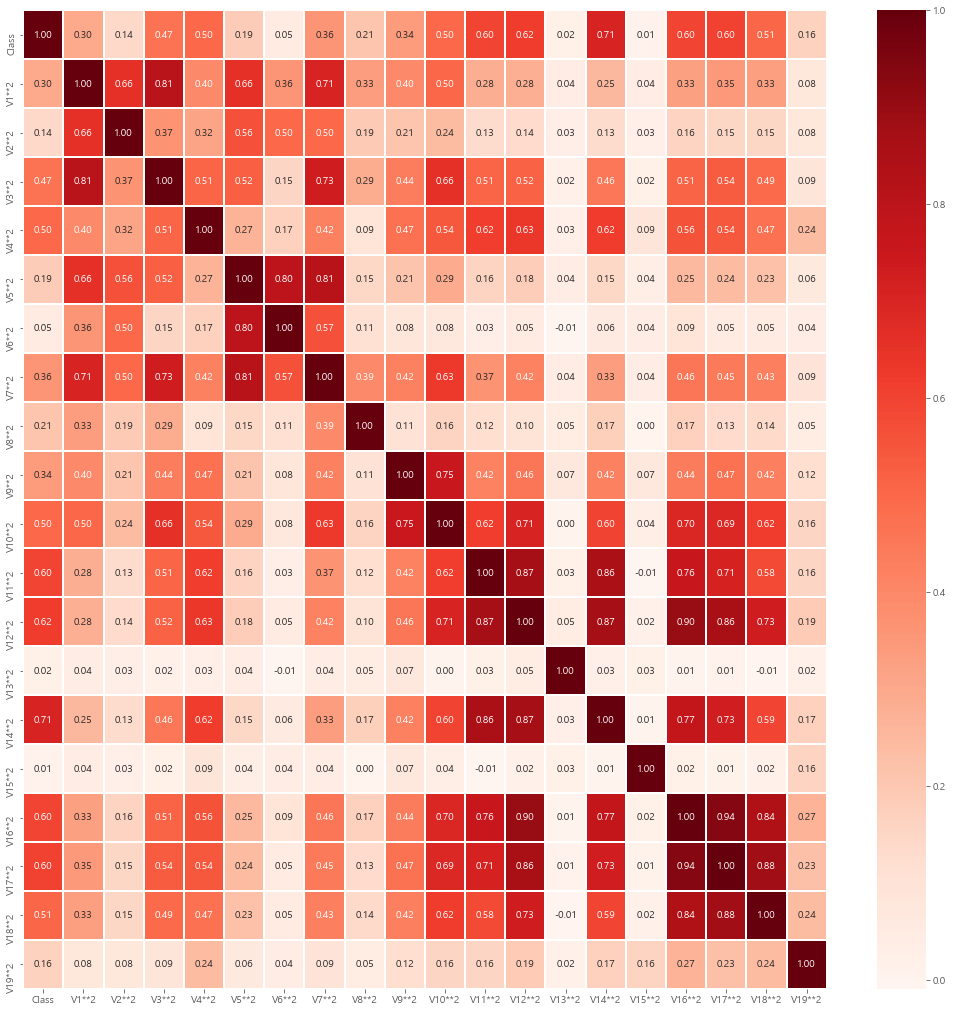

In [167]:
plt.rc('font', family='Malgun Gothic')
plt.rc("axes",unicode_minus=False)
plt.figure(figsize=(18,18))
sns.heatmap(train_new.iloc[:,19:].corr(), cmap = 'Reds', annot=True, fmt = '.2f', linewidths=1)
plt.show()

피쳐를 제곱한 칼럼인데 생각보다 상관계수가 높게 나왔습니다.

In [172]:
X = train_new.drop(columns = ['Class'])
y = train_new[['Class']]
model = LogisticRegression(random_state=44)
model.fit(X, y)
y_pred = model.predict(X_test_new)
print_score(y_test, y_pred.round())

Accuracy Score: 99.74%
_______________________________________________
Classification Report:
                     0          1  accuracy    macro avg  weighted avg
precision     0.998010   0.919355  0.997443     0.958682      0.997333
recall        0.999414   0.770270  0.997443     0.884842      0.997443
f1-score      0.998711   0.838235  0.997443     0.918473      0.997331
support    8530.000000  74.000000  0.997443  8604.000000   8604.000000
_______________________________________________
Confusion Matrix: 
 [[8525    5]
 [  17   57]]



하지만 성능에는 영향을 주지 않았습니다. 

## 결론

- smote 를 이용해 오버샘플링한 경우 성능 가장 좋았다.